## Проект по курсу "Теория вероятностей и математическая статистика"

По данным, содержащими в себе цены на недвижимость, необходимо:

1) проверить гипотезу, что среднее цены составляет 200000 у.е.;

2) проверить связь цены и размера района;

3) найти признаки с большой корреляцией и определить, какие из них можно не учитывать в модели формироования цены.

Расчеты производить для уровня значимости 0,05.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('prices.csv')
df.head()

,Square,LifeSquare,KitchenSquare,Ecology_1,Healthcare_1,Price,Rooms,Floor,HouseFloor,HouseYear,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Healthcare_1_null,DistrictSize
0,47.981560,29.442751,6.000000,0.089040,0.0,184966.94,2,7,9,1969,1,1,33,7976,5,0,11,1,1,22
1,65.683640,40.049541,8.000000,0.000070,240.0,300009.44,3,7,9,1978,1,1,46,10309,1,1,16,1,0,87
2,44.947952,29.197611,7.664446,0.049637,229.0,220925.90,2,8,12,1968,1,1,34,7759,0,1,3,1,0,174
3,61.731510,52.731510,9.000000,0.437885,1084.0,175616.23,2,8,17,1977,1,1,23,5735,3,0,5,1,0,179
4,39.649193,23.776169,7.000000,0.012339,2078.0,150226.53,1,11,12,1976,1,1,35,5776,1,2,4,1,0,97


### 1. Оценка среднего значения цены

Чтобы подтвердить, что среднее значение цены на недвижимость (в данном случае, насколько можно судить, в каком-то крупном городе или даже регионе), действительно равно заявленному, необходимо порверить гипотезу о равенстве математического ожидания этому значению.

Количество наблюдений:

In [3]:
n = len(df.index)
n

10000

**Расчетное среднее:**

In [4]:
price = df['Price']

price_mean = round(price.mean(), 0)
price_mean

214139.0

**Проверка гипотез:**

H0: M(x) = 200000,

H1: M(x) != 200000.


n = 10000, α = 0.05 => t = 1,967

In [5]:
M = 200000
t = (price_mean - M) / price.std()
t

0.1522413133756925

Значение по модулю найденного t не превышает t = 1,967, значит верна гипотеза H0, т.е средняя цена на недвижимость действительно составляет 200000 у.е.

### 2. Взаимосвязь цены и размера района

Построим график зависимости цены от размера района для визуальной оценки

In [6]:
size = df['DistrictSize']

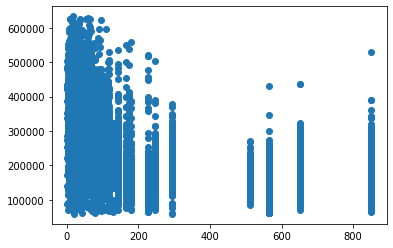

In [7]:
plt.scatter(size, price)
plt.show()

Визуально оценив, можно предположить, что в районах меньшего размера высокие цены встречаются чаще.
Для численной оценки рассчитаем коэффициент корреляции

In [8]:
r_matrix = np.corrcoef(price, size)
corr = r_matrix[0][1]
corr

-0.3786194755197434

Аналогичные расчеты по формулам:

In [9]:
cov = np.mean(np.multiply(price, size)) - np.mean(price_mean) * np.mean(size)
std_price = np.std(price)
std_size = np.std(size)
r = cov / (std_price * std_size)
r

-0.3786208596175889

**Вывод:** отрицательный знак коэффициента говорит об обратной зависимости между ценой и размером района, что подверждает первоначальную визуальную оценку. Значение же коэффициента говорит о том, что размер района применрно на 38% объясняет формирование цены.

### 3. Признаки с большой корреляцией

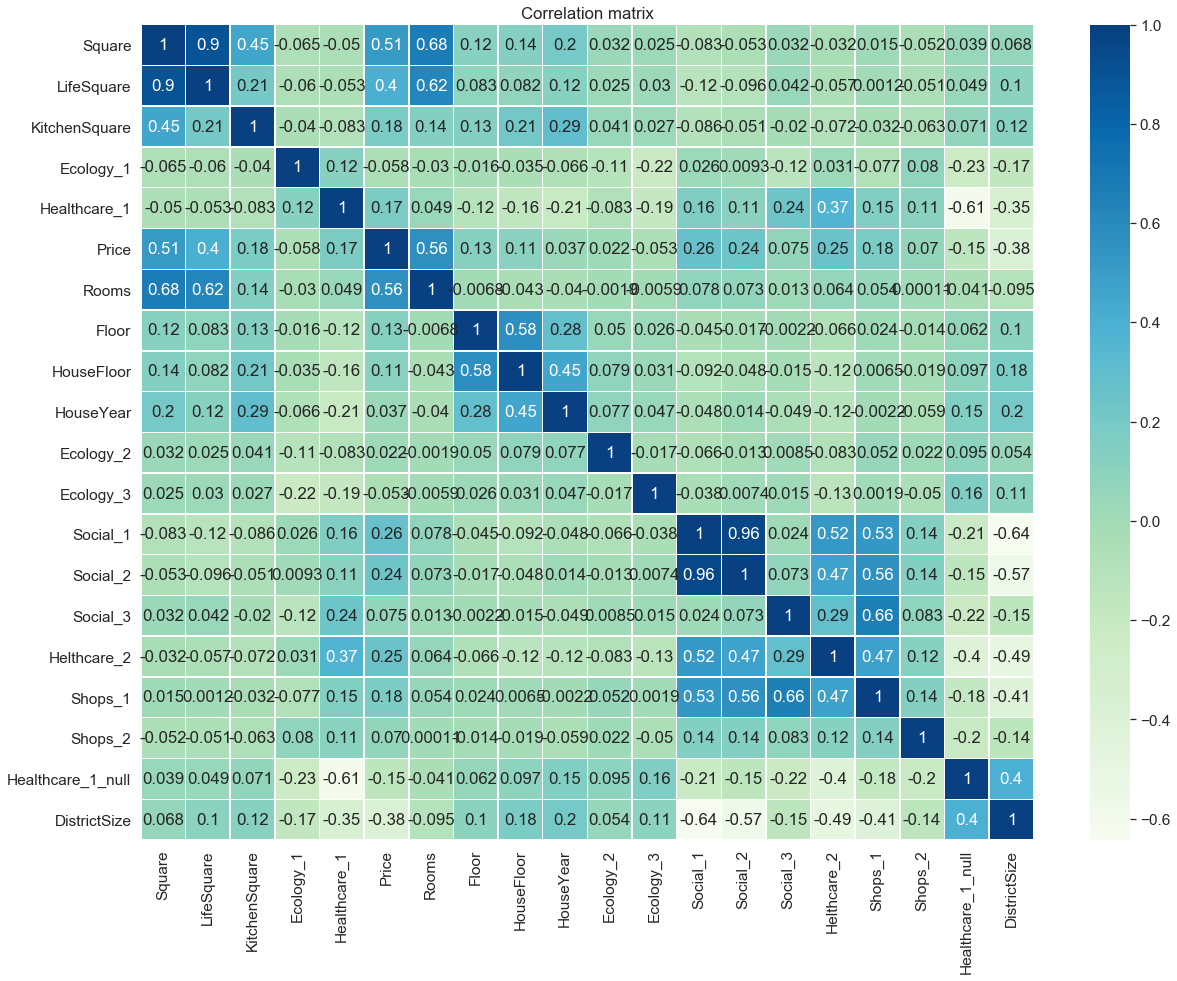

In [10]:
import seaborn as sns

plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

На графике видно, что наибольшими коэффициентами корреляции обладают признаки:
- Social_1 и Social_2,
- LifeSquare и Square.

На примере Social_1 и Social_2, построим модели линейной регрессии для этих признаков

In [11]:
from sklearn.linear_model import LinearRegression

def get_score(X, Y):
    lr = LinearRegression()
    lr.fit(X, Y)
    return lr.score(X, Y)

In [12]:
X = df.copy().drop('Price', axis=1)

In [13]:
social_1_name = 'Social_1'
social_1 = X[social_1_name]
X1 = X.copy().drop(social_1_name, axis=1)
get_score(X1, social_1)

0.9425981738579278

In [14]:
social_2_name = 'Social_2'
social_2 = X[social_2_name]
X2 = X.copy().drop(social_2_name, axis=1)
get_score(X2, social_2)

0.9307919116990871

Функция get_score рассчитывает коэффициент детерминации R^2.
Для признака Social_1 его значение немного больше аналогичного для Social_2 (0.94 > 0.93). Соответственно можно сделать вывод о том, что именно Social_1 вносит меньший вклад в модель и от него можно избавиться.